# 산탄데르(Santander) 고객 만족 예측

In [17]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv(r'D:\git_space\MSN\Machine-Learning\data\santander_train.csv', encoding='latin-1')
print(df.shape)
df.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [8]:
print(df['TARGET'].value_counts())
unsatisfied_cnt = df[df['TARGET']==1].TARGET.count()
total_cnt = df.TARGET.count()
print(unsatisfied_cnt / total_cnt)

0    73012
1     3008
Name: TARGET, dtype: int64
0.0395685345961589


### 0: 만족 1: 불만족인데 만족이 압도적으로 많으므로 이는 ROC-AUC로 평가하는 것이 좋다

In [10]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [13]:
df['var3'].replace(-999999, 2, inplace=True)
df.drop('ID', axis=1, inplace=True)

X_features = df.iloc[:, :-1]
y_labels = df.iloc[:, -1]
print(X_features.shape)

(76020, 369)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2)

print(X_train.shape, X_test.shape)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(y_train.value_counts() / train_cnt)
print(y_test.value_counts() / test_cnt)

(60816, 369) (15204, 369)
0    0.960372
1    0.039628
Name: TARGET, dtype: float64
0    0.960668
1    0.039332
Name: TARGET, dtype: float64


## XGBoost 사용

In [18]:
xgb = XGBClassifier(n_estimators=500)
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
pred_prob = xgb.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print('Score of roc_score :' ,roc_score)

[0]	validation_0-auc:0.796071	validation_1-auc:0.796957
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.805982	validation_1-auc:0.807819
[2]	validation_0-auc:0.808352	validation_1-auc:0.80965
[3]	validation_0-auc:0.809477	validation_1-auc:0.808569
[4]	validation_0-auc:0.814098	validation_1-auc:0.814534
[5]	validation_0-auc:0.814228	validation_1-auc:0.814502
[6]	validation_0-auc:0.814677	validation_1-auc:0.814994
[7]	validation_0-auc:0.815341	validation_1-auc:0.814855
[8]	validation_0-auc:0.815318	validation_1-auc:0.814788
[9]	validation_0-auc:0.815315	validation_1-auc:0.814852
[10]	validation_0-auc:0.815826	validation_1-auc:0.81519
[11]	validation_0-auc:0.816234	validation_1-auc:0.815373
[12]	validation_0-auc:0.817833	validation_1-auc:0.815734
[13]	validation_0-auc:0.81771	validation_1-auc:0.815535
[14]	validation_0-auc:0.820585	validation_1-auc:0.817951


In [20]:
# 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators=100)
params = {
    'max_depth': [5, 7],
    'min_child_weight': [1, 3],
    'colsample_bytree': [0.5, 0.75]
}

grid_cv = GridSearchCV(xgb, param_grid=params, cv=3)
grid_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
print(grid_cv.best_params_)
pred_prob = grid_cv.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print('Score of roc_score: ', roc_score)

auc:0.846021	validation_1-auc:0.833489
[10]	validation_0-auc:0.847254	validation_1-auc:0.833835
[11]	validation_0-auc:0.848004	validation_1-auc:0.834276
[12]	validation_0-auc:0.848389	validation_1-auc:0.835123
[13]	validation_0-auc:0.851998	validation_1-auc:0.836633
[14]	validation_0-auc:0.85373	validation_1-auc:0.837946
[15]	validation_0-auc:0.853837	validation_1-auc:0.838501
[16]	validation_0-auc:0.855287	validation_1-auc:0.83889
[17]	validation_0-auc:0.856312	validation_1-auc:0.839844
[18]	validation_0-auc:0.856966	validation_1-auc:0.840242
[19]	validation_0-auc:0.857893	validation_1-auc:0.840111
[20]	validation_0-auc:0.859357	validation_1-auc:0.841224
[21]	validation_0-auc:0.859734	validation_1-auc:0.841622
[22]	validation_0-auc:0.860348	validation_1-auc:0.842368
[23]	validation_0-auc:0.860861	validation_1-auc:0.842242
[24]	validation_0-auc:0.861489	validation_1-auc:0.842203
[25]	validation_0-auc:0.862177	validation_1-auc:0.842667
[26]	validation_0-auc:0.863106	validation_1-auc:0.8

In [22]:
xgb = XGBClassifier(n_esimators=1000, learning_rate=0.02, reg_alpha=0.03, colsample_bytree=0.5, max_depth=7, min_child_weight=3)
xgb.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
pred_prob = xgb.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print('Score of roc_score: ', roc_score)

[0]	validation_0-auc:0.755202	validation_1-auc:0.752551
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.823527	validation_1-auc:0.812823
[2]	validation_0-auc:0.815229	validation_1-auc:0.806302
[3]	validation_0-auc:0.824984	validation_1-auc:0.81803
[4]	validation_0-auc:0.830174	validation_1-auc:0.821299
[5]	validation_0-auc:0.827769	validation_1-auc:0.819261
[6]	validation_0-auc:0.82705	validation_1-auc:0.818954
[7]	validation_0-auc:0.831497	validation_1-auc:0.822435
[8]	validation_0-auc:0.83413	validation_1-auc:0.824213
[9]	validation_0-auc:0.83423	validation_1-auc:0.824076
[10]	validation_0-auc:0.83676	validation_1-auc:0.825628
[11]	validation_0-auc:0.839983	validation_1-auc:0.830315
[12]	validation_0-auc:0.841008	validation_1-auc:0.830362
[13]	validation_0-auc:0.840855	validation_1-auc:0.830608
[14]	validation_0-auc:0.840003	validation_1-auc:0.829696
[1

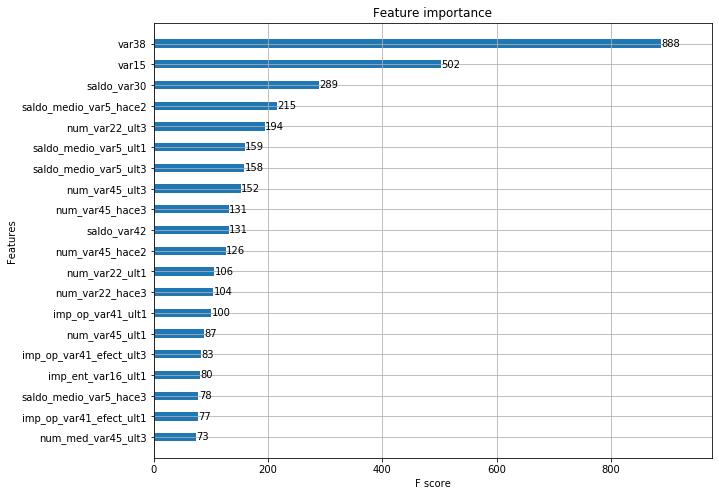

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb, ax=ax, max_num_features=20, height=0.4)

## LightGBM 사용

In [24]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=500)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
pred_prob = lgbm.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print('Score of roc_score: ', roc_score)

[1]	valid_0's auc: 0.81438	valid_0's binary_logloss: 0.157623
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822837	valid_0's binary_logloss: 0.152866
[3]	valid_0's auc: 0.824044	valid_0's binary_logloss: 0.149359
[4]	valid_0's auc: 0.82892	valid_0's binary_logloss: 0.146622
[5]	valid_0's auc: 0.83066	valid_0's binary_logloss: 0.144474
[6]	valid_0's auc: 0.831603	valid_0's binary_logloss: 0.142779
[7]	valid_0's auc: 0.836674	valid_0's binary_logloss: 0.141176
[8]	valid_0's auc: 0.839134	valid_0's binary_logloss: 0.139961
[9]	valid_0's auc: 0.839798	valid_0's binary_logloss: 0.138973
[10]	valid_0's auc: 0.840449	valid_0's binary_logloss: 0.138032
[11]	valid_0's auc: 0.841579	valid_0's binary_logloss: 0.137232
[12]	valid_0's auc: 0.841788	valid_0's binary_logloss: 0.136615
[13]	valid_0's auc: 0.841528	valid_0's binary_logloss: 0.136131
[14]	valid_0's auc: 0.841519	valid_0's binary_logloss: 0.135781
[15]	valid_0's auc: 0.842661	valid_0's binary_logloss:

In [25]:
lgbm = LGBMClassifier(n_estimators=200)
params = {
    'num_leaves': [32, 64],
    'max_depth': [128, 160],
    'min_child_samples': [60, 100],
    'subsample': [0.8, 1]
}
grid_cv = GridSearchCV(lgbm, param_grid=params, cv=3)
grid_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
print(grid_cv.best_params_)
pred_prob = grid_cv.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print('Score of roc_score: ', roc_score)

uc: 0.838133	valid_1's binary_logloss: 0.134143
[34]	valid_0's auc: 0.890465	valid_0's binary_logloss: 0.119702	valid_1's auc: 0.838073	valid_1's binary_logloss: 0.134164
[35]	valid_0's auc: 0.891247	valid_0's binary_logloss: 0.119365	valid_1's auc: 0.838107	valid_1's binary_logloss: 0.134125
[36]	valid_0's auc: 0.891953	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.838128	valid_1's binary_logloss: 0.134116
[37]	valid_0's auc: 0.892673	valid_0's binary_logloss: 0.118709	valid_1's auc: 0.838199	valid_1's binary_logloss: 0.134161
[38]	valid_0's auc: 0.893434	valid_0's binary_logloss: 0.118335	valid_1's auc: 0.838339	valid_1's binary_logloss: 0.134139
[39]	valid_0's auc: 0.893956	valid_0's binary_logloss: 0.118039	valid_1's auc: 0.838285	valid_1's binary_logloss: 0.134184
[40]	valid_0's auc: 0.894735	valid_0's binary_logloss: 0.117684	valid_1's auc: 0.838306	valid_1's binary_logloss: 0.134176
[41]	valid_0's auc: 0.895432	valid_0's binary_logloss: 0.117361	valid_1's auc: 0.838326	vali

### XGBoost 와 Score는 비슷하나 속도가 엄청나게 빨랐다

In [31]:
lgbm = LGBMClassifier(n_esimators=1000, max_depth=128, min_child_samples=60, num_leaves=64, subsample=0.8)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
pred_prob = lgbm.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print('Score of roc_score: ', roc_score)

[LightGBM] [Warning] Unknown parameter: n_esimators
[1]	valid_0's auc: 0.818375	valid_0's binary_logloss: 0.157549
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.825578	valid_0's binary_logloss: 0.152394
[3]	valid_0's auc: 0.829322	valid_0's binary_logloss: 0.148763
[4]	valid_0's auc: 0.834088	valid_0's binary_logloss: 0.146137
[5]	valid_0's auc: 0.835357	valid_0's binary_logloss: 0.143884
[6]	valid_0's auc: 0.837792	valid_0's binary_logloss: 0.141929
[7]	valid_0's auc: 0.840226	valid_0's binary_logloss: 0.140424
[8]	valid_0's auc: 0.841536	valid_0's binary_logloss: 0.139249
[9]	valid_0's auc: 0.841424	valid_0's binary_logloss: 0.138225
[10]	valid_0's auc: 0.841882	valid_0's binary_logloss: 0.137389
[11]	valid_0's auc: 0.84328	valid_0's binary_logloss: 0.136649
[12]	valid_0's auc: 0.843295	valid_0's binary_logloss: 0.136048
[13]	valid_0's auc: 0.843508	valid_0's binary_logloss: 0.135476
[14]	valid_0's auc: 0.844304	valid_0's binary_logloss: 0.135004
